<a href="https://colab.research.google.com/github/SibeleTatiana/WebAggregat/blob/main/Praticando_R_L_Polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gerar uma Regressão Polinomial.
Calcular o maior grau possível da regressão polinomial considerando que o overfit ocorre com 20%.

In [1]:
import pandas as pd

df = pd.read_csv('/home/archive (1).zip')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [3]:
df.rename(columns={
    'region_southwest': 'southwest',
    'region_southeast': 'southeast',
    'region_northeast': 'northeast',
    'region_northwest': 'northwest',
    'smoker_yes': 'smoker',
    'sex_female': 'sex'
}, inplace=True)

In [4]:
df['southwest']=df.apply(lambda row: 1 if row['region'] == 'southwest' else 0, axis=1)
df['southeast']=df.apply(lambda row: 1 if row['region'] == 'southeast' else 0, axis=1)
df['northwest']=df.apply(lambda row: 1 if row['region'] == 'northwest' else 0, axis=1)
df['northeast']=df.apply(lambda row: 1 if row['region'] == 'northeast' else 0, axis=1)

df['smoker']=df.apply(lambda row: 1 if row['smoker'] == 'yes' else 0, axis=1)
df['sex']=df.apply(lambda row: 1 if row['sex'] == 'female' else 0, axis=1)

del df['region']
df.head(5)

,age,sex,bmi,children,smoker,charges,southwest,southeast,northwest,northeast
0,19,1,27.900,0,1,16884.92400,1,0,0,0
1,18,0,33.770,1,0,1725.55230,0,1,0,0
2,28,0,33.000,3,0,4449.46200,0,1,0,0
3,33,0,22.705,0,0,21984.47061,0,0,1,0
4,32,0,28.880,0,0,3866.85520,0,0,1,0


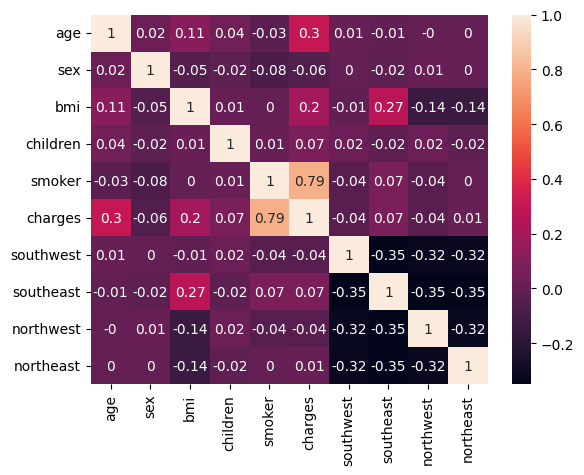

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression

x = df[['smoker']]
y = df['charges']

model = LinearRegression()
model.fit(x, y)
print(model.score(x, y))


0.6197648148218988


In [7]:
x = df.drop('charges', axis='columns')
y = df['charges']

model = LinearRegression()
model.fit(x, y)
print(model.score(x, y))


0.7509130345985207


In [8]:
import statsmodels.api as sm
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Tue, 03 Sep 2024   Prob (F-statistic):               0.00
Time:                        21:49:38   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.013e+04    791.569    -12.792      0.0

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

degree = 1
while True:
  poly_f = PolynomialFeatures(degree=degree)
  x_train_poly = poly_f.fit_transform(x_train.to_numpy())
  x_test_poly = poly_f.fit_transform(x_test.to_numpy())

  model = LinearRegression()
  model.fit(x_train_poly, y_train)
  score_train = model.score(x_train_poly, y_train)
  score_test = model.score(x_test_poly, y_test)

  if score_train / score_test - 1 >= 0.2:
    break
  degree = degree + 1

print("Melhor grau:", degree - 1)
print("Score treino:", score_train)
print("Score test:", score_test)


Melhor grau: 4
Score treino: 0.9157870329396779
Score test: 0.21006025341214984
